

*  Make sure to **Make a Copy** before answering
*  You may use **Kaggle** or any other data gathering site to get your data
* If the dataset you got has NaN values, you can add extra cells and the code
 to clean the data
* You may add extra cells for visualizing and plotting too, to see whether it is linear or non-linear
* You may use the **Colab Notebooks** uploaded in our *Machine Learning Channel* for reference
*  Tip: Since you are required to create a **Multiple Regression Model**, the dataset you must find is the one with **multiple features**






# Create a Multiple Regression Model

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

In [34]:
# Load the dataset you've gathered
student = pd.read_csv('./mentalhealth_dataset.csv')
student

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-09,Female,20,KOE,year 1,2.31,0,1,0,0,6,0,1,3,7,1
996,2023-07-09,Female,23,Engineering,year 1,3.72,1,0,0,0,3,0,4,1,12,2
997,2023-07-09,Female,19,Human Sciences,Year 2,2.00,0,0,1,0,1,0,5,4,3,1
998,2023-07-09,Female,24,Human Sciences,Year 2,3.89,1,0,1,0,5,0,5,4,13,3


In [35]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   int64  
 3   Course                      1000 non-null   object 
 4   YearOfStudy                 1000 non-null   object 
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13  StudyStressLevel            1000 n

data cleaning - handling missing data

In [36]:
student.describe()

,Age,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.402000,3.122530,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000
std,2.373611,0.810961,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673
min,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.250000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000
50%,21.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000
75%,24.000000,4.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,7.0000,1.000000,5.000000,5.000000,19.000000,5.000000


In [38]:
student.isnull().sum()

,0
Timestamp,0
Gender,0
Age,0
Course,0
YearOfStudy,0
CGPA,0
Depression,0
Anxiety,0
PanicAttack,0
SpecialistTreatment,0


split data


In [42]:
X = student.drop(['Timestamp', 'CGPA'], axis=1)
y = student['CGPA']

# nakaw - converts categorical variables into dummy/indicator variables (known as one-hot encoding)
X = pd.get_dummies(X, drop_first=True)


X.head()
# y.head()

,Age,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,...,Course_Usuluddin,Course_engin,Course_koe,Course_psychology,YearOfStudy_Year 2,YearOfStudy_Year 3,YearOfStudy_year 1,YearOfStudy_year 2,YearOfStudy_year 3,YearOfStudy_year 4
0,24,1,0,0,0,5,0,4,5,8,...,False,False,False,False,False,True,False,False,False,False
1,18,0,1,0,0,0,0,4,4,13,...,False,False,False,False,False,True,False,False,False,False
2,25,0,0,1,0,3,0,1,2,13,...,False,False,False,False,False,True,False,False,False,False
3,18,0,0,0,0,3,0,5,1,19,...,False,False,False,False,False,False,False,False,False,True
4,20,1,1,0,0,0,0,2,4,3,...,False,False,False,False,False,False,False,False,False,True


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# wait lang sa svm na yan eheheh (imean, oks lang po ba i-try ung multi linear? ;-;)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [45]:
# make predictions
y_pred_multi = model_multi.predict(X_test)
y_pred_multi

array([3.26805149, 4.17777342, 2.60509191, 2.15086417, 4.37186811,
       1.98268265, 2.16045813, 3.09226616, 4.41538912, 3.05836441,
       2.84716525, 3.35110114, 2.51243699, 3.81950246, 4.448691  ,
       2.48984628, 3.23087593, 3.93700328, 2.01875428, 2.27616485,
       2.60201771, 2.97262157, 4.31636059, 1.95938881, 3.64121565,
       3.79515398, 1.98092363, 3.36103443, 1.90444013, 3.75950193,
       4.11018623, 4.38379718, 1.6979124 , 3.25547984, 4.02494853,
       2.41680275, 2.84829692, 2.19822173, 4.42066744, 3.00145112,
       2.31562855, 2.45475016, 2.73718487, 1.82308803, 3.83232928,
       2.36614284, 2.45231571, 3.86900405, 1.99444601, 3.98986644,
       2.89425396, 2.41074852, 2.88408246, 2.25001493, 4.21190868,
       2.88063268, 2.03840634, 4.07217239, 1.81652266, 3.2817514 ,
       3.60684668, 4.52972928, 3.65100299, 3.47618904, 2.54654404,
       3.98167728, 2.07287125, 3.91486375, 3.91119538, 1.86461782,
       3.93952315, 3.42492699, 3.0151782 , 1.95505529, 2.05744

In [46]:
# evaluate model
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Mean Squared Error:", mse_multi) # low value is better
print("R-squared:", r2_multi) # value close to 1 or 100% is better

Mean Squared Error: 0.06982370817366629
R-squared: 0.8943206684692654


continue

In [47]:
# Train multiple regression model using Support Vector Regression
model_svr = SVR(kernel='linear')
model_svr.fit(X_train, y_train)



SVR(kernel='linear')

In [61]:
# Make predictions
y_pred_svr = model_svr.predict(X_test)
y_pred_svr


array([3.26655328, 4.15820747, 2.5777305 , 2.154478  , 4.29839678,
       1.9944919 , 2.16094722, 3.08004318, 4.38473927, 3.05565783,
       2.7795082 , 3.37869879, 2.46872977, 3.79519635, 4.36693878,
       2.46797297, 3.2086768 , 3.94143114, 2.00074634, 2.23832419,
       2.57249389, 2.96853478, 4.3684428 , 1.93253441, 3.62416423,
       3.80879857, 1.99102204, 3.27094723, 1.88654483, 3.76739715,
       4.05219996, 4.36864109, 1.63614952, 3.25689299, 4.05626278,
       2.43700562, 2.79535757, 2.1673718 , 4.42801652, 3.0086254 ,
       2.30267412, 2.49138722, 2.73697917, 1.73484699, 3.806749  ,
       2.35825713, 2.42490054, 3.88821922, 1.97142798, 3.96535663,
       2.86560077, 2.40734017, 2.9176181 , 2.24462792, 4.23798369,
       2.85809406, 2.07375829, 4.06109867, 1.78248945, 3.26731702,
       3.64409504, 4.49153444, 3.64809258, 3.45645603, 2.57663202,
       3.96440105, 2.09420569, 3.87515857, 3.86491802, 1.89511482,
       3.89618385, 3.46176568, 3.05869704, 1.9888051 , 2.03251

In [62]:
# Evaluate the model using MSE and R2 score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)




In [63]:
# Display the MSE and R2 score
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)


Mean Squared Error: 0.07225356844776303
R-squared: 0.8906430349519943


# Improve models with Hyperparameters

In [64]:
# Define a parameter grid for Support Vector Regression
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}


In [65]:
# Perform Grid Search
grid_search = GridSearchCV(model_svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [66]:
# Best parameters and model
svr_best = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'C': 0.1, 'epsilon': 0.1}


# Optimize and Save Model

In [67]:
# import
import joblib

In [68]:
# Save the best SVR model
joblib.dump(svr_best, 'best_svr_model.pkl')


['best_svr_model.pkl']

In [69]:
# Load the SVR Model for future use
loaded_svr_model = joblib.load('best_svr_model.pkl')
y_pred_loaded_svr = loaded_svr_model.predict(X_test)


In [73]:
# Display the loaded SVR model predictions

mse_new = mean_squared_error(y_test, y_pred_loaded_svr)
print("Loaded SVR MSE: ", mse_new)
print("\n")
print("Loaded SVR Predictions: ", y_pred_loaded_svr)

Loaded SVR MSE:  0.06956503428138648


Loaded SVR Predictions:  [3.24948196 4.14957573 2.59635048 2.19975385 4.29663561 1.97967897
 2.14037062 3.08968908 4.40053825 3.04135701 2.81619708 3.41349893
 2.47917858 3.78135974 4.36261125 2.46789501 3.19719972 3.93679796
 2.03149461 2.27278326 2.58049802 2.97355897 4.36858373 1.94252037
 3.64462358 3.83433415 1.99474997 3.29004742 1.8655812  3.75974526
 4.0949651  4.38122379 1.63856945 3.28526797 4.05689556 2.43101161
 2.80561989 2.17206842 4.41056613 3.01418207 2.31696577 2.50354191
 2.86698309 1.73865755 3.81136449 2.38445012 2.42335907 3.9000789
 1.97028622 3.95627556 2.87075485 2.42510979 2.90566744 2.28295906
 4.21962333 2.84707742 2.07023662 4.05766927 1.81704368 3.30004097
 3.65112382 4.47530908 3.64462164 3.46771045 2.60482006 3.93743141
 2.14528995 3.87371863 3.85580676 1.90466483 3.94588392 3.47895162
 3.03600631 1.98911921 2.03578964 2.23171146 2.37601837 4.27471125
 2.92425947 2.97535207 4.06324703 2.68522122 2.87639732 2.87922157

In [77]:
# vis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

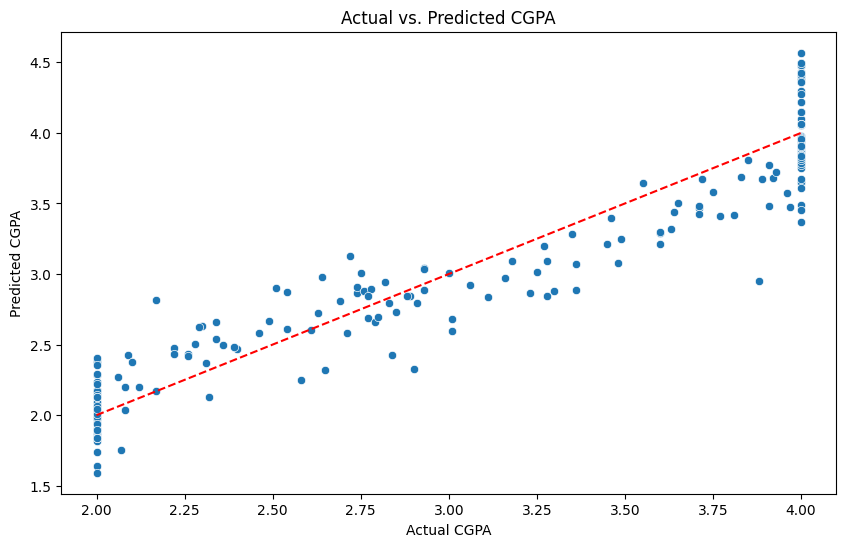

In [83]:
# actual vs predicted - nakaw na code
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_loaded_svr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs. Predicted CGPA')
plt.show()

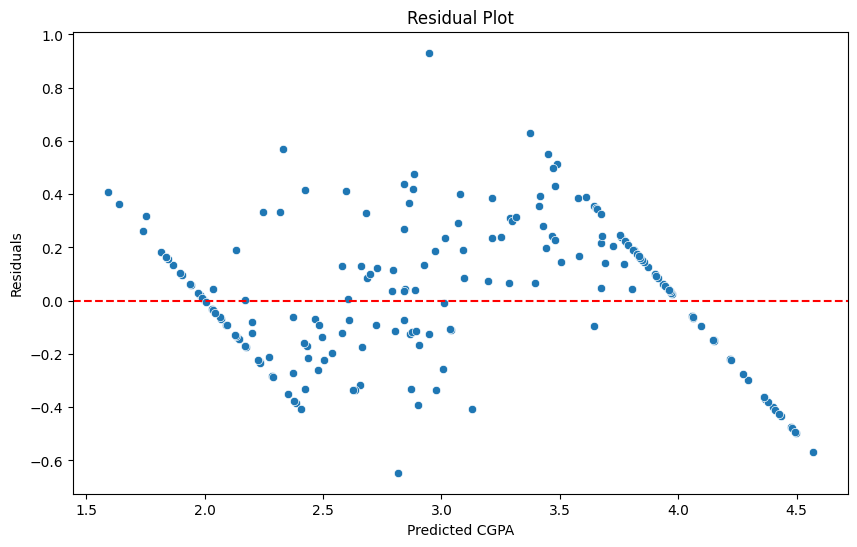

In [86]:
# residual plot - nakaw
residuals = y_test - y_pred_loaded_svr
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_loaded_svr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CGPA')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 'yun lang, hindi ko alam kung anong evaluation sa mga plot na 'to hahahah 😆😔